<a href="https://colab.research.google.com/github/Syarafina-Dewi/textblob-sentiment-analysis/blob/main/Textblob_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**World Cup Qatar Sentiment Analysis**

Pada tanggal 2 Desember 2010 Qatar diumumkan sebagai tuan rumah Piala Dunia FIFA 2022. Ini adalah pertama kalinya negara Arab menjadi tuan rumah turnamen ini. Notebook yang hadir berusaha melakukan analisis sentimen terhadap Qatar sebelum, sesudah pengumuman, dan ketika Piala Dunia 2022 berlangsung. 

# Web Scraping

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.9 MB/s 


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.4 MB/s 
     |████████████████████████████████| 110 kB 69.1 MB/s 


In [ ]:
# Import libraries
import pandas as pd
import snscrape.modules.twitter as sntwitter
import re
import numpy as np
import string
import contractions
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english')) # Declare stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Using TwitterSearchScraper to scrape data and append tweets to list
def twitterScrapper(string):
    tweets_list = [] # Creating list to append tweet data to
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string).get_items()):
        if i>200000:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    return tweets_list

## Before Announcement

02 Desember 2007 - 01 Desember 2010

In [ ]:
# Creating a dataframe from the tweets list above
before_tweets_df = pd.DataFrame(twitterScrapper('Qatar 2022 World Cup until:2010-12-01 since:2009-03-01'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [ ]:
before_tweets_df.shape

(3604, 4)

In [ ]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
before_tweets_df.head(30)

,Datetime,Tweet Id,Text,Username
0,2010-11-30 21:44:44+00:00,9724536941453312,"Handicapping the 2022 World Cup Candidates - Qatar – First of all, Qatar is HOT in the summer, like kill... http://tumblr.com/xfzxxnsrs",jeff_underscore
1,2010-11-30 21:42:18+00:00,9723922840817664,"Aussies 2022 World Cup bid takes a hit report ranks Aus last in revenue USA scored 100%, AUS 68%, Japan 73%, Sth Korea 71%, Qatar 70%",meredith_gibbs
2,2010-11-30 21:35:11+00:00,9722133114527744,Branding The #Qatar World Cup 2022 Bid MT @RobaAssi: http://bit.ly/i9QfTS via @natashaTynes,octavianasr
3,2010-11-30 21:25:17+00:00,9719639542079489,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ... http://bit.ly/fOn8VA #worldcup,DC_Cappers
4,2010-11-30 21:04:10+00:00,9714326378123265,Spector scored those two goals in order to get back at Sir Alex Ferguson backing Qatar's 2022 World Cup Bid. #goUSAbid,ChrisThomasFC
5,2010-11-30 20:50:52+00:00,9710979881377792,Qatar bidding nation FIFA world cup 2022,AAzizAlthani
6,2010-11-30 20:38:29+00:00,9707860946587648,#panorama fallout. My take http://ow.ly/3hyjz #worldcup #england2018 #russia2018 #usa2022 #qatar2022 #australia2022 #holland,dodo938
7,2010-11-30 20:27:44+00:00,9705156048330752,@kamzou08: Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ...: Qatar 2022 World Cup Bid Gets Boost from Fa... http:/...,The_Fa_Cup_
8,2010-11-30 20:26:17+00:00,9704792125349889,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ...: Qatar 2022 World Cup Bid Gets Boost from Fa... http://bit.ly/eJceUh,kamzou08
9,2010-11-30 20:20:01+00:00,9703215696191488,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ... http://bit.ly/eKcnS0,Boobee_Punyisa


In [ ]:
before_tweets_df['Datetime'] = pd.to_datetime(before_tweets_df['Datetime']).dt.date
before_tweets_df

,Datetime,Tweet Id,Text,Username
0,2010-11-30,9724536941453312,"Handicapping the 2022 World Cup Candidates - Qatar – First of all, Qatar is HOT in the summer, like kill... http://tumblr.com/xfzxxnsrs",jeff_underscore
1,2010-11-30,9723922840817664,"Aussies 2022 World Cup bid takes a hit report ranks Aus last in revenue USA scored 100%, AUS 68%, Japan 73%, Sth Korea 71%, Qatar 70%",meredith_gibbs
2,2010-11-30,9722133114527744,Branding The #Qatar World Cup 2022 Bid MT @RobaAssi: http://bit.ly/i9QfTS via @natashaTynes,octavianasr
3,2010-11-30,9719639542079489,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ... http://bit.ly/fOn8VA #worldcup,DC_Cappers
4,2010-11-30,9714326378123265,Spector scored those two goals in order to get back at Sir Alex Ferguson backing Qatar's 2022 World Cup Bid. #goUSAbid,ChrisThomasFC
...,...,...,...,...
3599,2009-03-17,1342245573,"RT @bbcme Qatar bids to host 2022 World Cup: Qatar is among 11 countries in contention to host the 2022 World Cup, the gov.. http://tiny ...",yazeez
3600,2009-03-17,1342198539,Qatar bids to host 2022 World Cup http://bit.ly/1ADvUa,RSS_BBC
3601,2009-03-17,1342138366,BBC News | World: Qatar bids to host 2022 World Cup http://tinyurl.com/d6ppzj,1second
3602,2009-03-17,1341244803,20 Qatar submits FIFA World Cup bid: FIFA heads meet Qatari FA delegation for 2018 and/or 2022 FIFA World Cup .. http://tinyurl.com/cgqgme,MariaKhaan


In [ ]:
before_tweets_df.dtypes

Datetime    object
Tweet Id     int64
Text        object
Username    object
dtype: object

In [ ]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
before_tweets_df['Datetime'] =  pd.to_datetime(before_tweets_df['Datetime'], format="%Y-%m-%d")

In [ ]:
before_tweets_df.dtypes

Datetime    datetime64[ns]
Tweet Id             int64
Text                object
Username            object
dtype: object

In [ ]:
from pandas import Grouper
before_tweets_df_date = before_tweets_df.groupby(pd.Grouper(key='Datetime', axis=0, freq='M')).count()
before_tweets_df_date

,Tweet Id,Text,Username
Datetime,,,
2009-03-31,13,13,13
2009-04-30,1,1,1
2009-05-31,22,22,22
2009-06-30,1,1,1
2009-07-31,21,21,21
2009-08-31,9,9,9
2009-09-30,5,5,5
2009-10-31,40,40,40
2009-11-30,116,116,116


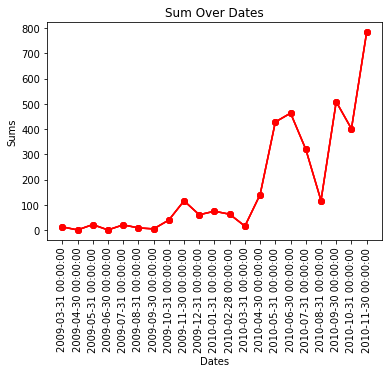

In [ ]:
dates = before_tweets_df_date.index 
sums = before_tweets_df_date.values 

fig, ax = plt.subplots()

ax.plot(range(len(dates)), sums, 'ro-')
ax.set_xticks(range(0, len(dates), 1))       # need to adjust to ensure plot is readable
ax.set_xticklabels(dates[::1], rotation=90)
ax.set_xlabel("Dates")
ax.set_ylabel("Sums")
ax.set_title("Sum Over Dates")
plt.show();

### Data pre-processing

In [ ]:
# Drop unnecesary columns
before_tweets_df = before_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [ ]:
# Change tweet column name
before_tweets_df.columns = before_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [ ]:
# Add sentiment and tweet column
before_tweets_df['Tweet'] = np.nan
before_tweets_df

,Original Tweet,Tweet
0,"Handicapping the 2022 World Cup Candidates - Qatar – First of all, Qatar is HOT in the summer, like kill... http://tumblr.com/xfzxxnsrs",NaN
1,"Aussies 2022 World Cup bid takes a hit report ranks Aus last in revenue USA scored 100%, AUS 68%, Japan 73%, Sth Korea 71%, Qatar 70%",NaN
2,Branding The #Qatar World Cup 2022 Bid MT @RobaAssi: http://bit.ly/i9QfTS via @natashaTynes,NaN
3,Qatar 2022 World Cup Bid Gets Boost from Facebook – Mediabistro ... http://bit.ly/fOn8VA #worldcup,NaN
4,Spector scored those two goals in order to get back at Sir Alex Ferguson backing Qatar's 2022 World Cup Bid. #goUSAbid,NaN
...,...,...
3599,"RT @bbcme Qatar bids to host 2022 World Cup: Qatar is among 11 countries in contention to host the 2022 World Cup, the gov.. http://tiny ...",NaN
3600,Qatar bids to host 2022 World Cup http://bit.ly/1ADvUa,NaN
3601,BBC News | World: Qatar bids to host 2022 World Cup http://tinyurl.com/d6ppzj,NaN
3602,20 Qatar submits FIFA World Cup bid: FIFA heads meet Qatari FA delegation for 2018 and/or 2022 FIFA World Cup .. http://tinyurl.com/cgqgme,NaN


#### Cleaning

In [ ]:
# Pre-processing
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.compile('https?://\S+|www\.\S+').sub(r'', tweet) # Remove hyperlinks

    if tweet.startswith("rt"): # Remove retweets (repetitions)
        i = tweet.find(':')
        if i != -1:
            tweet = tweet[i+2:]
    
    tweet = re.compile('@[^\s]+').sub(r'', tweet) # Mentions 
    tweet = re.compile(r'#([^\s]+)').sub(r'\1', tweet) # Remove hashtags
    tweet = re.sub('@', 'at', tweet)
    tweet = contractions.fix(tweet) # Fix english contractions
    tweet  = ''.join([char for char in tweet if char not in string.punctuation]) #Remove punctuation characters
    tweet = re.compile('[^A-Za-z]').sub(r' ', tweet) # Remove any other non-alphabet characters
    tweet = ' '.join([w for w in tweet.split() if w not in english_stopwords]) #Remove stop words  
    
    return tweet

In [ ]:
before_tweets_df['Tweet'] = before_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [ ]:
before_tweets_df = before_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
before_tweets_df.head(20)

,Original Tweet,Tweet
0,Handicapping the 2022 World Cup Candidates - Q...,handicapping world cup candidates qatar first ...
1,Aussies 2022 World Cup bid takes a hit report ...,aussies world cup bid takes hit report ranks a...
2,Branding The #Qatar World Cup 2022 Bid MT @Rob...,branding qatar world cup bid mt via
3,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...
4,Spector scored those two goals in order to get...,spector scored two goals order get back sir al...
5,Qatar bidding nation FIFA world cup 2022,qatar bidding nation fifa world cup
6,#panorama fallout. My take http://ow.ly/3hyjz ...,panorama fallout take worldcup england russia ...
7,@kamzou08: Qatar 2022 World Cup Bid Gets Boost...,qatar world cup bid gets boost facebook mediab...
8,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...
9,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...


### Obtain sentiment

In [ ]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
before_tweets_df[['Polarity', 'Subjectivity']] = before_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
nltk.downloader.download('vader_lexicon')

#Calculating Negative, Positive, Neutral and Compound values
for index, row in before_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        before_tweets_df.loc[index,'Sentiment'] = "-1"
    else :
        before_tweets_df.loc[index,'Sentiment'] = "1"
    
    before_tweets_df.loc[index,'neg'] = neg
    before_tweets_df.loc[index,'pos'] = pos
    before_tweets_df.loc[index,'compound'] = comp

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
before_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,pos,compound
0,Handicapping the 2022 World Cup Candidates - Q...,handicapping world cup candidates qatar first ...,0.25,0.591667,-1,0.29,0.154,-0.4939
1,Aussies 2022 World Cup bid takes a hit report ...,aussies world cup bid takes hit report ranks a...,0.00,0.066667,1,0.00,0.000,0.0000
2,Branding The #Qatar World Cup 2022 Bid MT @Rob...,branding qatar world cup bid mt via,0.00,0.000000,1,0.00,0.000,0.0000
3,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.252,0.4019
4,Spector scored those two goals in order to get...,spector scored two goals order get back sir al...,0.00,0.000000,1,0.00,0.068,0.0258
5,Qatar bidding nation FIFA world cup 2022,qatar bidding nation fifa world cup,0.00,0.000000,1,0.00,0.000,0.0000
6,#panorama fallout. My take http://ow.ly/3hyjz ...,panorama fallout take worldcup england russia ...,0.00,0.000000,1,0.00,0.000,0.0000
7,@kamzou08: Qatar 2022 World Cup Bid Gets Boost...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.278,0.6597
8,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.293,0.6597
9,Qatar 2022 World Cup Bid Gets Boost from Faceb...,qatar world cup bid gets boost facebook mediab...,0.00,0.000000,1,0.00,0.278,0.4019


In [ ]:
before_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment          object
neg               float64
pos               float64
compound          float64
dtype: object

In [ ]:
before_tweets_df['Sentiment'] = before_tweets_df['Sentiment'].astype(str).astype(int)

<ipython-input-24-4717975a7855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_tweets_df['Sentiment'] = before_tweets_df['Sentiment'].astype(str).astype(int)


### Results visualization

In [ ]:
#New dataframes for all sentiments
before_tweets_negative = before_tweets_df[before_tweets_df['Sentiment']== -1]
before_tweets_positive = before_tweets_df[before_tweets_df['Sentiment']== 1]

In [ ]:
# Count values of each sentiment 
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna = False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values = count_values_in_column(before_tweets_df,'Sentiment')

In [ ]:
count_values

,Total,Percentage
1,2277,88.46
-1,297,11.54


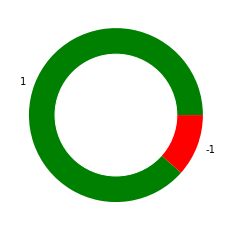

In [ ]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']
 
# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels=sentiments, colors=['green','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

Sebelum Qatar diumumkan sebagai tuan rumah, tweet 1 tahun sebelumnya menunjukkan bahwa orang memiliki sedikit perasaan negatif terhadap negara ini. Sebaliknya, sentimen positif atau netral menghasilkan lebih dari 80% dari total data yang diambil.

In [ ]:
#Function to create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["qatar", "qatars", "world cup", "world cup 2022"])
    wc = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words = 100).generate(text)
    wc.to_file('word_cloud.png')
    
    print('Word Cloud Saved')
    path = 'word_cloud.png'
    display(Image.open(path))

Word Cloud Saved


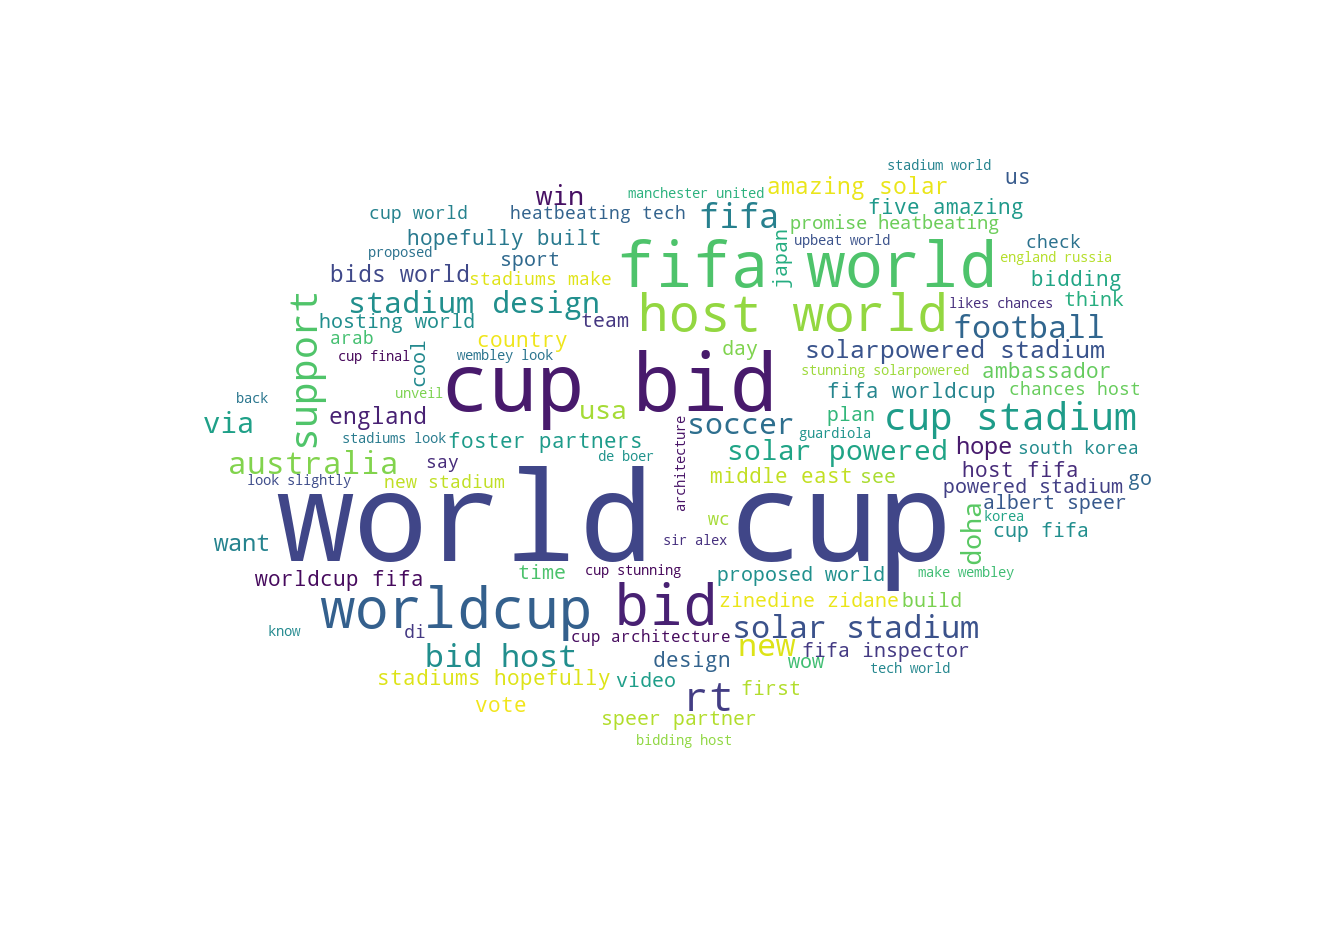

In [ ]:
# Positive sentiments Word cloud 
before_positive_values = " ".join(tw for tw in before_tweets_positive.Tweet)
create_wordcloud(before_positive_values)

Word Cloud Saved


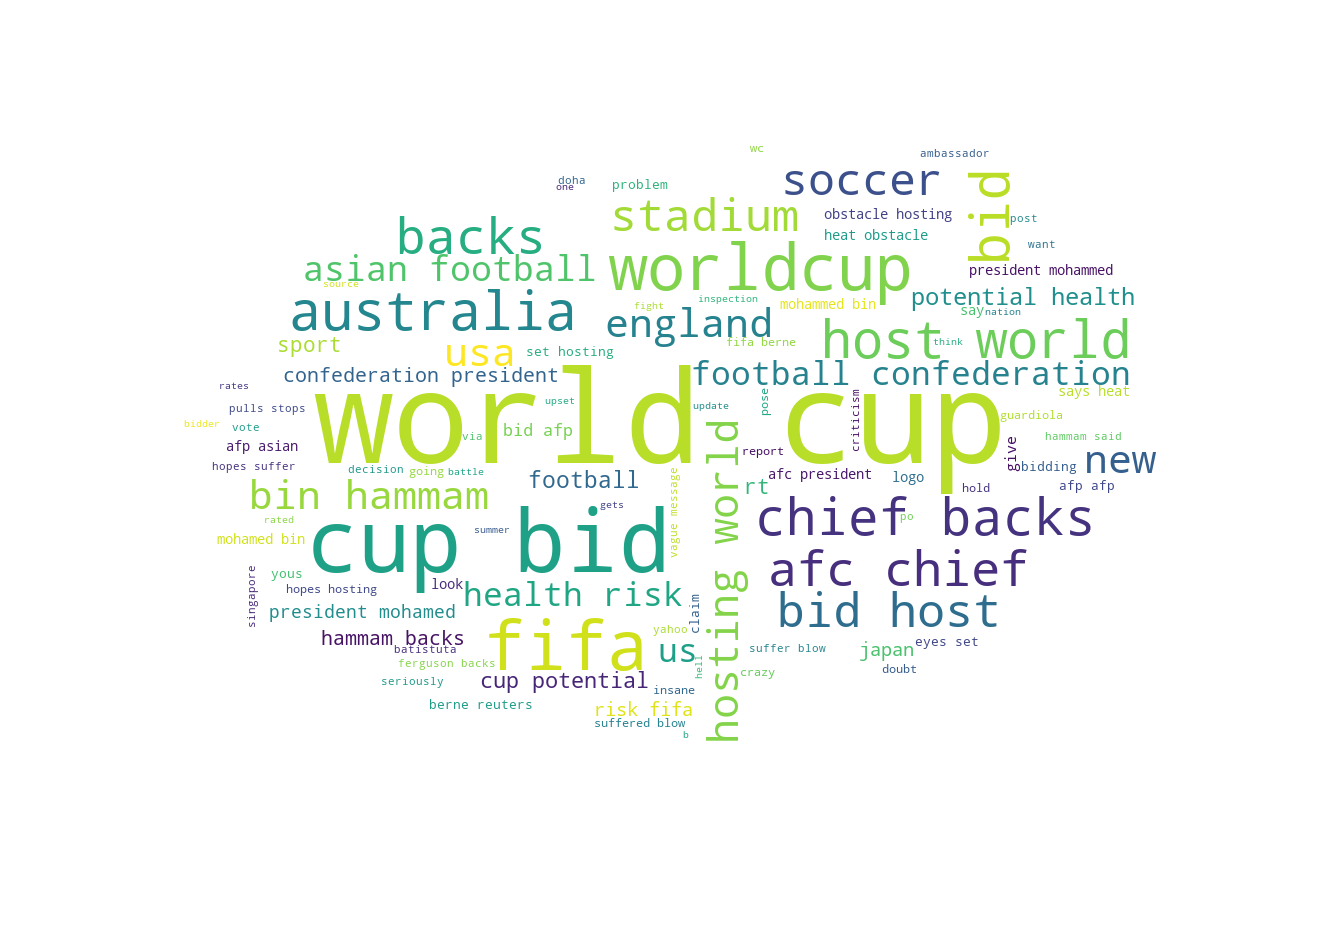

In [ ]:
# Negative sentiments Word cloud 
before_negative_values = " ".join(tw for tw in before_tweets_negative.Tweet)
create_wordcloud(before_negative_values)

## After Announcement

December 02, 2010 - May 02, 2011

In [ ]:
# Creating a dataframe from the tweets list above
during_tweets_df = pd.DataFrame(twitterScrapper('Qatar 2022 World Cup lang:en until:2011-12-02 since:2010-12-02'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [ ]:
during_tweets_df.shape

(41225, 4)

In [ ]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
during_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,pos,compound
0,Clouds linger over Qatar 2022 FIFA World Cup hosting ...: Australia's top football official reignited speculatio... http://t.co/EeI6wLlk,clouds linger qatar fifa world cup hosting australias top football official reignited speculatio,0.50,0.50,1,0.000,0.130,0.2023
1,"@TheLeakyWiki 2022 Qatar World Cup Not Chosen as a Result of Bribery, Leaked Emails Show http://t.co/uoMJU9Xr",qatar world cup chosen result bribery leaked emails show,0.00,0.00,-1,0.223,0.000,-0.3182
2,More Hot News: http://t.co/CDWFTRFg - Qatar Plans to Host 2022 World Cup in Island Stadium,hot news qatar plans host world cup island stadium,0.25,0.85,1,0.000,0.000,0.0000
3,If it goes through all i can say is I would put my house on Qatar winning the world cup in 2022. #cashcow,goes say would put house qatar winning world cup cashcow,0.50,0.75,1,0.000,0.274,0.5267
4,Clouds linger over Qatar 2022 FIFA World Cup hosting | http://t.co/LpvR8tC5 http://t.co/akGX7IBW,clouds linger qatar fifa world cup hosting,0.00,0.00,1,0.000,0.000,0.0000
5,"When named the World Cup hosts, Qatar were 122th in the FIFA rankings. They aim to be much more successful by 2022 http://t.co/dRde962C",named world cup hosts qatar th fifa rankings aim much successful,0.75,0.95,1,0.000,0.275,0.5859
6,As well as hosting World Cup 2022 Qatar wins bid to host 2012 climate talks!,well hosting world cup qatar wins bid host climate talks,0.30,0.20,1,0.000,0.420,0.7003
7,WOW “@Football_Speak: This will blow your mind!! --&gt; Amazing pics of the Stadiums to be built for Qatar World Cup 2022 http://t.co/IdPoAt7t”,wow blow mind gt amazing pics stadiums built qatar world cup,0.35,0.95,1,0.000,0.548,0.8658
8,“@AliAlmslmani: RT @jassimalrumaihi: Imagine the World Cup in this weather. Can see myself going for every game! #Qatar2022”,rt imagine world cup weather see going every game qatar,-0.40,0.40,1,0.000,0.000,0.0000
9,RT @jassimalrumaihi: Imagine the World Cup in this weather. Can see myself going for every game! #Qatar2022,imagine world cup weather see going every game qatar,-0.40,0.40,1,0.000,0.000,0.0000


In [ ]:
during_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment           int64
neg               float64
pos               float64
compound          float64
dtype: object

In [ ]:
during_tweets_df['Datetime'] = pd.to_datetime(during_tweets_df.Datetime).dt.tz_localize(None)

In [ ]:
during_tweets_df.dtypes

Datetime    datetime64[ns]
Tweet Id             int64
Text                object
Username            object
dtype: object

In [ ]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
during_tweets_df['Datetime'] =  pd.to_datetime(during_tweets_df['Datetime'], format="%Y-%m-%d")

In [ ]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
#during_tweets_df['Datetime'] =  pd.to_datetime(during_tweets_df['Datetime'], format="%Y-%m-%d")

In [ ]:
from pandas import Grouper
during_tweets_df_date = during_tweets_df.groupby(pd.Grouper(key='Datetime', axis=0, freq='M')).count()
during_tweets_df_date

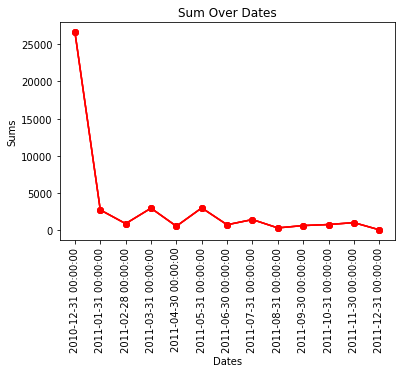

In [ ]:
dates = during_tweets_df_date.index 
sums = during_tweets_df_date.values 

fig, ax = plt.subplots()

ax.plot(range(len(dates)), sums, 'ro-')
ax.set_xticks(range(0, len(dates), 1))       # need to adjust to ensure plot is readable
ax.set_xticklabels(dates[::1], rotation=90)
ax.set_xlabel("Dates")
ax.set_ylabel("Sums")
ax.set_title("Sum Over Dates")
plt.show();

### Data pre-processing

In [ ]:
# Drop unnecesary columns
during_tweets_df = during_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [ ]:
# Change tweet column name
during_tweets_df.columns = during_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [ ]:
# Add sentiment and tweet column
during_tweets_df['Tweet'] = np.nan
during_tweets_df

,Original Tweet,Tweet
0,Clouds linger over Qatar 2022 FIFA World Cup hosting ...: Australia's top football official reignited speculatio... http://t.co/EeI6wLlk,NaN
1,"@TheLeakyWiki 2022 Qatar World Cup Not Chosen as a Result of Bribery, Leaked Emails Show http://t.co/uoMJU9Xr",NaN
2,More Hot News: http://t.co/CDWFTRFg - Qatar Plans to Host 2022 World Cup in Island Stadium,NaN
3,If it goes through all i can say is I would put my house on Qatar winning the world cup in 2022. #cashcow,NaN
4,Clouds linger over Qatar 2022 FIFA World Cup hosting | http://t.co/LpvR8tC5 http://t.co/akGX7IBW,NaN
...,...,...
41220,"Fifa: Last, Who Would You Like To Host 2022 World Cup?: Qatar. USA had their 1st one.\nRelated Posts\n\nWhy Is Germ... http://bit.ly/gaT4C4",NaN
41221,Exclusive: World Cup voting set to remain a mystery http://ow.ly/3ivhn #worldcup #fifa #england2018 #australia2022 #qatar2022 #usa2022,NaN
41222,"Screw the English-speaking world, huh? RT @BrentChaney: Bookies have Russia getting 2018 World Cup and Qatar in 2022??? Ugh.",NaN
41223,Putin absence gives hope to World Cup 2018 bidders http://ow.ly/3ivg5 #spain2018 #portugal2018 #qatar2022 #australia2022,NaN


#### Cleaning

In [ ]:
during_tweets_df['Tweet'] = during_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [ ]:
during_tweets_df = during_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
during_tweets_df.head(10)

,Original Tweet,Tweet
0,Clouds linger over Qatar 2022 FIFA World Cup h...,clouds linger qatar fifa world cup hosting aus...
1,@TheLeakyWiki 2022 Qatar World Cup Not Chosen ...,qatar world cup chosen result bribery leaked e...
2,More Hot News: http://t.co/CDWFTRFg - Qatar Pl...,hot news qatar plans host world cup island sta...
3,If it goes through all i can say is I would pu...,goes say would put house qatar winning world c...
4,Clouds linger over Qatar 2022 FIFA World Cup h...,clouds linger qatar fifa world cup hosting
5,"When named the World Cup hosts, Qatar were 122...",named world cup hosts qatar th fifa rankings a...
6,As well as hosting World Cup 2022 Qatar wins b...,well hosting world cup qatar wins bid host cli...
7,WOW “@Football_Speak: This will blow your mind...,wow blow mind gt amazing pics stadiums built q...
8,“@AliAlmslmani: RT @jassimalrumaihi: Imagine t...,rt imagine world cup weather see going every g...
9,RT @jassimalrumaihi: Imagine the World Cup in ...,imagine world cup weather see going every game...


### Obtain sentiment

In [ ]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
during_tweets_df[['Polarity', 'Subjectivity']] = during_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#Calculating Negative, Positive, and Compound values
for index, row in during_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        during_tweets_df.loc[index,'Sentiment'] = "-1"
    else:
        during_tweets_df.loc[index,'Sentiment'] = "1"
    
    during_tweets_df.loc[index,'neg'] = neg
    during_tweets_df.loc[index,'pos'] = pos
    during_tweets_df.loc[index,'compound'] = comp

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
during_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment          object
neg               float64
pos               float64
compound          float64
dtype: object

In [ ]:
during_tweets_df['Sentiment'] = during_tweets_df['Sentiment'].astype(str).astype(int)

<ipython-input-49-be1f5fecf1d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_tweets_df['Sentiment'] = during_tweets_df['Sentiment'].astype(str).astype(int)


In [ ]:
during_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,pos,compound
0,Clouds linger over Qatar 2022 FIFA World Cup h...,clouds linger qatar fifa world cup hosting aus...,0.50,0.50,1,0.000,0.130,0.2023
1,@TheLeakyWiki 2022 Qatar World Cup Not Chosen ...,qatar world cup chosen result bribery leaked e...,0.00,0.00,-1,0.223,0.000,-0.3182
2,More Hot News: http://t.co/CDWFTRFg - Qatar Pl...,hot news qatar plans host world cup island sta...,0.25,0.85,1,0.000,0.000,0.0000
3,If it goes through all i can say is I would pu...,goes say would put house qatar winning world c...,0.50,0.75,1,0.000,0.274,0.5267
4,Clouds linger over Qatar 2022 FIFA World Cup h...,clouds linger qatar fifa world cup hosting,0.00,0.00,1,0.000,0.000,0.0000
5,"When named the World Cup hosts, Qatar were 122...",named world cup hosts qatar th fifa rankings a...,0.75,0.95,1,0.000,0.275,0.5859
6,As well as hosting World Cup 2022 Qatar wins b...,well hosting world cup qatar wins bid host cli...,0.30,0.20,1,0.000,0.420,0.7003
7,WOW “@Football_Speak: This will blow your mind...,wow blow mind gt amazing pics stadiums built q...,0.35,0.95,1,0.000,0.548,0.8658
8,“@AliAlmslmani: RT @jassimalrumaihi: Imagine t...,rt imagine world cup weather see going every g...,-0.40,0.40,1,0.000,0.000,0.0000
9,RT @jassimalrumaihi: Imagine the World Cup in ...,imagine world cup weather see going every game...,-0.40,0.40,1,0.000,0.000,0.0000


### Results visualization

In [ ]:
#New dataframes for all sentiments
during_tweets_negative = during_tweets_df[during_tweets_df['Sentiment']== -1]
during_tweets_positive = during_tweets_df[during_tweets_df['Sentiment']== 1]

In [ ]:
# Count values of each sentiment 
count_values = count_values_in_column(during_tweets_df,'Sentiment')

In [ ]:
count_values

,Total,Percentage
1,23147,79.38
-1,6013,20.62


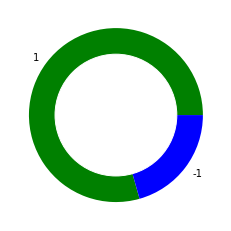

In [ ]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']
 
# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels=sentiments, colors=['green','blue','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

Pada hari Qatar diumumkan sebagai tuan rumah dan 6 bulan berikutnya, ada peningkatan jumlah tweet yang menyebutkan negara ini. Hasilnya menunjukkan bahwa perasaan positif tetap memimpin dengan persentase yang hampir sama dengan sebelumnya. Namun, ada peningkatan jumlah sentimen negatif dan penurunan sentimen netral. Bias di sini adalah kumpulan pengguna Twitter tumbuh pesat, hampir dua kali lipat, dari 2010 hingga 2011.

Word Cloud Saved


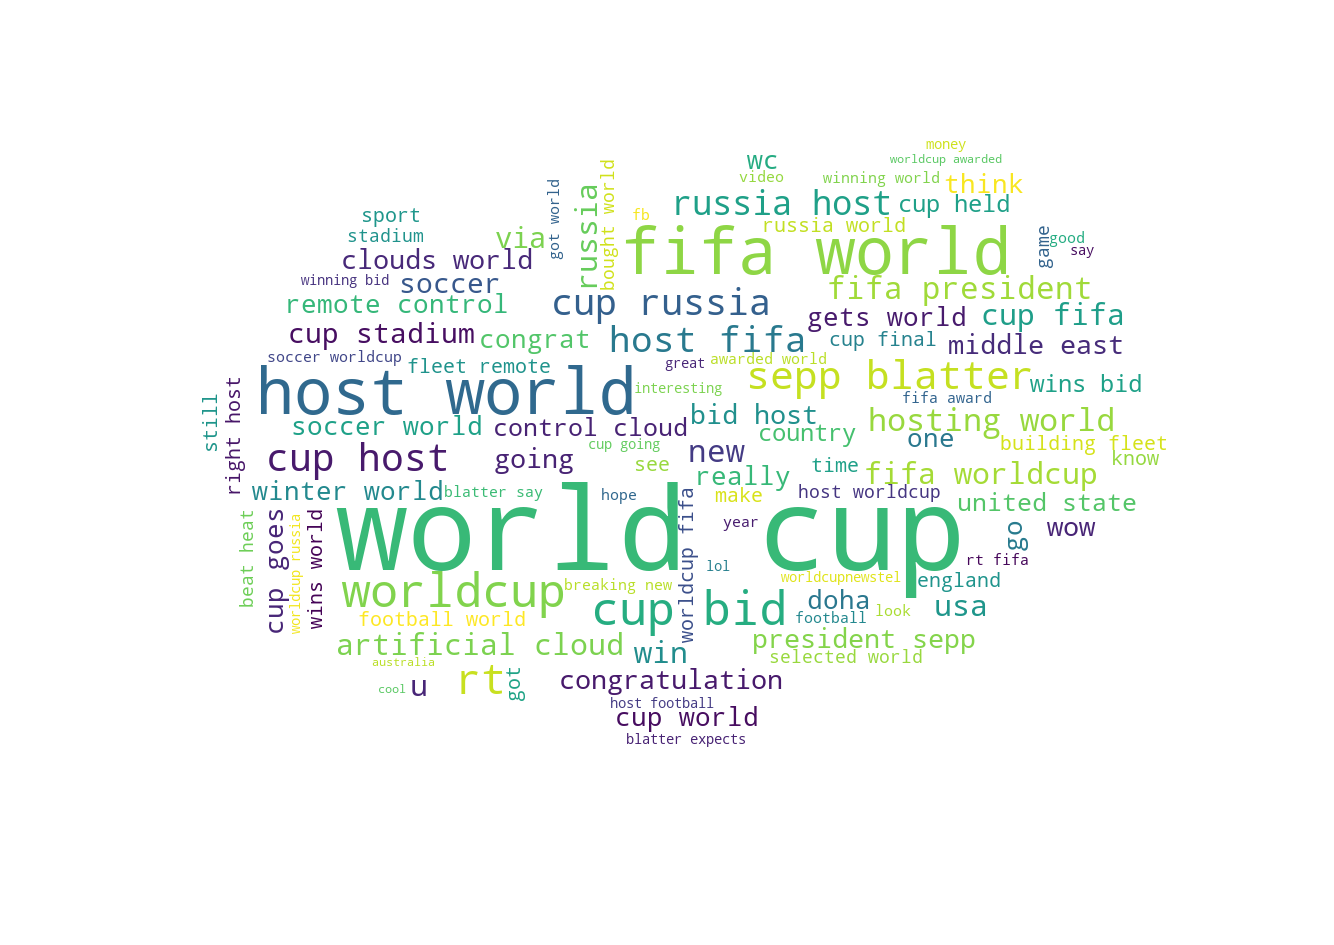

In [ ]:
# Positive sentiments Word cloud 
during_positive_values = " ".join(tw for tw in during_tweets_positive.Tweet)
create_wordcloud(during_positive_values)

Word Cloud Saved


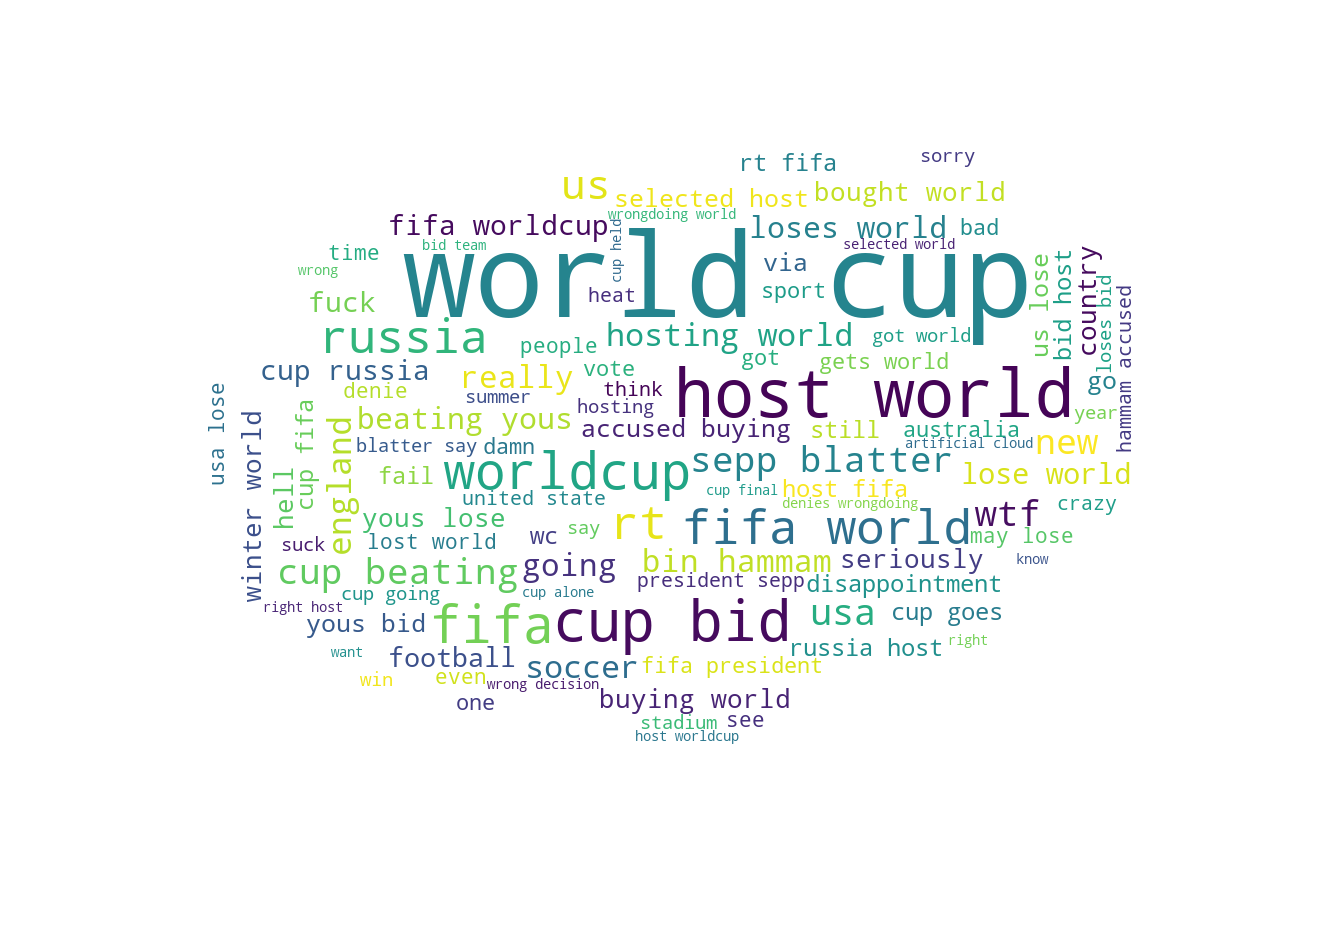

In [ ]:
# Negative sentiments Word cloud 
during_negative_values = " ".join(tw for tw in during_tweets_negative.Tweet)
create_wordcloud(during_negative_values)

## During World Cup Qatar 2022

In [ ]:
# Creating a dataframe from the tweets list above
after_tweets_df = pd.DataFrame(twitterScrapper('Qatar 2022 World Cup lang:en until:2022-12-18 since:2022-11-20'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [ ]:
after_tweets_df.shape

(200001, 4)

In [ ]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
after_tweets_df.head(10)

,Datetime,Tweet Id,Text,Username
0,2022-12-17 23:59:05+00:00,1604264953288003585,"The real work of art was me, but these were cool too I guess 💚😂 @ World Cups24 - Qatar World Cup 2022 https://t.co/AInIUNkHg9",iBxTheProdigy
1,2022-12-17 23:57:54+00:00,1604264657635737602,Quem vai ganhar a Copa?\nWho is going to win the World Cup?\n#Qatar2022 #FIFAWorldCup ⚽️🏆🔥,FelipeMojave
2,2022-12-17 23:55:42+00:00,1604264101034987520,"@brfootball @meltqeen So proud of you, Morocco. 👏🇲🇦 Your journey in the World Cup this year really so amazing.\n#Morocco \n#MoroccovsCroatia \n#Qatar2022 \n#QatarWorldCup2022",anothermissoh
3,2022-12-17 23:55:00+00:00,1604263928007196672,@FIFAWorldCup Clash of the Titans #FRAARG #Qatar2022 #FIFAWorldCup,rhydoremmy23
4,2022-12-17 23:53:42+00:00,1604263598259322885,"Zlatko Dalic, happy with what he achieved in the Qatar 2022 World Cup: “This bronze tastes like gold” https://t.co/p4jyO7FdtL",24Happenings
5,2022-12-17 23:51:27+00:00,1604263033840304129,The #Vatreni do it again! #3rdPlace is theirs! 🇭🇷🏆🇲🇦 @HNS_CFF @EnMaroc @FIFAWorldCup #FIFAWorldCup #CROMAR #Croatia #CRO #Morocco #MAR #AtlasLions #3erLugar #Qatar2022 #Catar2022 #CopaMundial #football #futbol #soccer @ Khalifa International Stadium https://t.co/y9CBx58E6l https://t.co/s0WOaGp72j,cerati9
6,2022-12-17 23:48:01+00:00,1604262170019102725,These are the origins of the France team playing in the Qatar Worldcup 2022 #FIFAWorldCup #FrancevsArgentina https://t.co/mZlSH4B30T,Justice85305206
7,2022-12-17 23:47:30+00:00,1604262037978324994,It all comes down to this 😤 \n\n#FIFAWorldCup #Qatar2022,FIFAWorldCup
8,2022-12-17 23:46:15+00:00,1604261725356036096,I can’t imagine World Cup without Maradona!\nHe was and always will be a legend in football. \n#Maradona #Argentina #QatarWorldCup #Qatar2022 https://t.co/gbkqccuZQi,MohamedAbdulwa
9,2022-12-17 23:45:26+00:00,1604261517381206017,"❤️❤️❤️ To celebrate the 2022 World Cup in Qatar 🤑🤑🤑, all new users who register now will get $10 for free. Sign up to get it. Activity in progress ✊✊✊✊\nOfficial website: https://t.co/suj8dYeUAo\nCustomer service link: https://t.co/2HQZZimEcb\nTwitter: https://t.co/ZifDmfgXsb",NFTgamming


In [ ]:
after_tweets_df.dtypes

Datetime    datetime64[ns, UTC]
Tweet Id                  int64
Text                     object
Username                 object
dtype: object

In [ ]:
after_tweets_df['Datetime'] = pd.to_datetime(after_tweets_df.Datetime).dt.tz_localize(None)

In [ ]:
after_tweets_df.dtypes

Datetime    datetime64[ns]
Tweet Id             int64
Text                object
Username            object
dtype: object

In [ ]:
from pandas import Grouper
after_tweets_df_date = after_tweets_df.groupby(pd.Grouper(key='Datetime', axis=0, freq='D')).count()
after_tweets_df_date

,Tweet Id,Text,Username
Datetime,,,
2022-11-21,16133,16133,16133
2022-11-22,16436,16436,16436
2022-11-23,11719,11719,11719
2022-11-24,9010,9010,9010
2022-11-25,11806,11806,11806
2022-11-26,6925,6925,6925
2022-11-27,6932,6932,6932
2022-11-28,6410,6410,6410
2022-11-29,10161,10161,10161


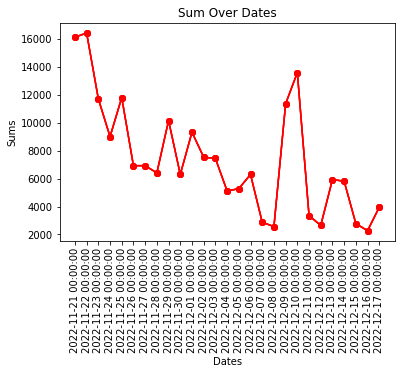

In [ ]:
dates = after_tweets_df_date.index 
sums = after_tweets_df_date.values 

fig, ax = plt.subplots()

ax.plot(range(len(dates)), sums, 'ro-')
ax.set_xticks(range(0, len(dates), 1))       # need to adjust to ensure plot is readable
ax.set_xticklabels(dates[::1], rotation=90)
ax.set_xlabel("Dates")
ax.set_ylabel("Sums")
ax.set_title("Sum Over Dates")
plt.show();

### Data pre-processing

In [ ]:
# Drop unnecesary columns
after_tweets_df = after_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [ ]:
# Change tweet column name
after_tweets_df.columns = after_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [ ]:
# Add sentiment and tweet column
after_tweets_df['Tweet'] = np.nan
after_tweets_df

,Original Tweet,Tweet
0,"The real work of art was me, but these were cool too I guess 💚😂 @ World Cups24 - Qatar World Cup 2022 https://t.co/AInIUNkHg9",NaN
1,Quem vai ganhar a Copa?\nWho is going to win the World Cup?\n#Qatar2022 #FIFAWorldCup ⚽️🏆🔥,NaN
2,"@brfootball @meltqeen So proud of you, Morocco. 👏🇲🇦 Your journey in the World Cup this year really so amazing.\n#Morocco \n#MoroccovsCroatia \n#Qatar2022 \n#QatarWorldCup2022",NaN
3,@FIFAWorldCup Clash of the Titans #FRAARG #Qatar2022 #FIFAWorldCup,NaN
4,"Zlatko Dalic, happy with what he achieved in the Qatar 2022 World Cup: “This bronze tastes like gold” https://t.co/p4jyO7FdtL",NaN
...,...,...
199996,"Countdown to Qatar: Spain | We continue our FIFA World Cup 2022 previews with a look at another nation with Chelsea representation, Spain, who have Blues captain Cesar Azpilicueta among their ranks in Qatar... https://t.co/MXK3iqDsme",NaN
199997,"Remember Mohammad Abbaspour who was a 33 year-old, Arsenal fan. He can’t watch the #ENGIRN World Cup because the Islamic Regime murdered him on 1/8/2020 in the PS752 flight.\n#Qatar2022 \n#SayTheirNames https://t.co/XkqutbhVpV",NaN
199998,"World Cup: A quick guide to the Qatar 2022 tournament - https://t.co/pe5pXbU0oM{ \nQatar is the first Arab nation to host the tournament, but it follows strict Muslim laws and same-sex relationships are banned. The country has also been criticised for its human rights record an...",NaN
199999,"With #England kicking off their #Qatar2022 campaign today, Sean Keyes has discussed why #TeamSutcliffe will be screening the game, as well as the ethical quandaries surrounding the #WorldCup itself 🏆🏴󠁧󠁢󠁥󠁮󠁧󠁿⚽️\n\nhttps://t.co/9TyFrZiP4P",NaN


#### Cleaning

In [ ]:
after_tweets_df['Tweet'] = after_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [ ]:
after_tweets_df = after_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
after_tweets_df.head(10)

,Original Tweet,Tweet
0,"The real work of art was me, but these were co...",real work art cool guess world cups qatar worl...
1,Quem vai ganhar a Copa?\nWho is going to win t...,quem vai ganhar copa going win world cup qatar...
2,"@brfootball @meltqeen So proud of you, Morocco...",proud morocco journey world cup year really am...
3,@FIFAWorldCup Clash of the Titans #FRAARG #Qat...,clash titans fraarg qatar fifaworldcup
4,"Zlatko Dalic, happy with what he achieved in t...",zlatko dalic happy achieved qatar world cup br...
5,The #Vatreni do it again! #3rdPlace is theirs...,vatreni rdplace fifaworldcup cromar croatia cr...
6,These are the origins of the France team play...,origins france team playing qatar worldcup fif...
7,It all comes down to this 😤 \n\n#FIFAWorldCup ...,comes fifaworldcup qatar
8,I can’t imagine World Cup without Maradona!\nH...,cannot imagine world cup without maradona alwa...
9,❤️❤️❤️ To celebrate the 2022 World Cup in Qata...,celebrate world cup qatar new users register g...


### Obtain sentiment

In [ ]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
after_tweets_df[['Polarity', 'Subjectivity']] = after_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#Calculating Negative, Positive and Compound values
for index, row in after_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        after_tweets_df.loc[index,'Sentiment'] = "-1"
    else:
        after_tweets_df.loc[index,'Sentiment'] = "1"
    
    after_tweets_df.loc[index,'neg'] = neg
    after_tweets_df.loc[index,'pos'] = pos
    after_tweets_df.loc[index,'compound'] = comp

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
after_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,pos,compound
0,"The real work of art was me, but these were co...",real work art cool guess world cups qatar worl...,0.275000,0.475000,1,0.0,0.204,0.3182
1,Quem vai ganhar a Copa?\nWho is going to win t...,quem vai ganhar copa going win world cup qatar...,0.800000,0.400000,1,0.0,0.297,0.5859
2,"@brfootball @meltqeen So proud of you, Morocco...",proud morocco journey world cup year really am...,0.700000,0.950000,1,0.0,0.418,0.8016
3,@FIFAWorldCup Clash of the Titans #FRAARG #Qat...,clash titans fraarg qatar fifaworldcup,0.000000,0.000000,1,0.0,0.000,0.0000
4,"Zlatko Dalic, happy with what he achieved in t...",zlatko dalic happy achieved qatar world cup br...,0.800000,1.000000,1,0.0,0.408,0.7351
5,The #Vatreni do it again! #3rdPlace is theirs...,vatreni rdplace fifaworldcup cromar croatia cr...,0.000000,0.000000,1,0.0,0.000,0.0000
6,These are the origins of the France team play...,origins france team playing qatar worldcup fif...,0.000000,0.000000,1,0.0,0.205,0.2023
7,It all comes down to this 😤 \n\n#FIFAWorldCup ...,comes fifaworldcup qatar,0.000000,0.000000,1,0.0,0.000,0.0000
8,I can’t imagine World Cup without Maradona!\nH...,cannot imagine world cup without maradona alwa...,0.000000,0.000000,1,0.0,0.000,0.0000
9,❤️❤️❤️ To celebrate the 2022 World Cup in Qata...,celebrate world cup qatar new users register g...,0.268182,0.627273,1,0.0,0.380,0.8689


### Results visualization

In [ ]:
#New dataframes for all sentiments
after_tweets_negative = after_tweets_df[after_tweets_df['Sentiment']== -1]
after_tweets_positive = after_tweets_df[after_tweets_df['Sentiment']== 1]

In [ ]:
# Count values of each sentiment 
count_values = count_values_in_column(after_tweets_df,'Sentiment')

In [ ]:
count_values

,Total,Percentage
1,139147,83.72
-1,27051,16.28


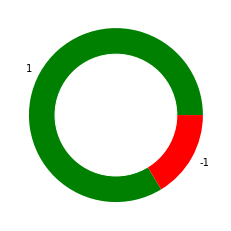

In [ ]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']

# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels = sentiments, colors = ['green','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

Setelah pengumuman Qatar sebagai tuan rumah dan hingga saat ini, jumlah tweet kembali meningkat drastis. Persentase tweet positif hanya mengalami sedikit penurunan. Namun, sesuatu yang menarik terjadi, sentimen negatif hampir dua kali lipat menjadi 41% dan sentimen netral kini menjadi opini minor.

In [ ]:
before_tweets_df.dtypes

Original Tweet     object
Tweet              object
Polarity          float64
Subjectivity      float64
Sentiment           int64
neg               float64
pos               float64
compound          float64
dtype: object

In [ ]:
after_tweets_df['Sentiment'] = after_tweets_df['Sentiment'].astype(str).astype(int)

<ipython-input-89-30c38572dda0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_tweets_df['Sentiment'] = after_tweets_df['Sentiment'].astype(str).astype(int)


Word Cloud Saved


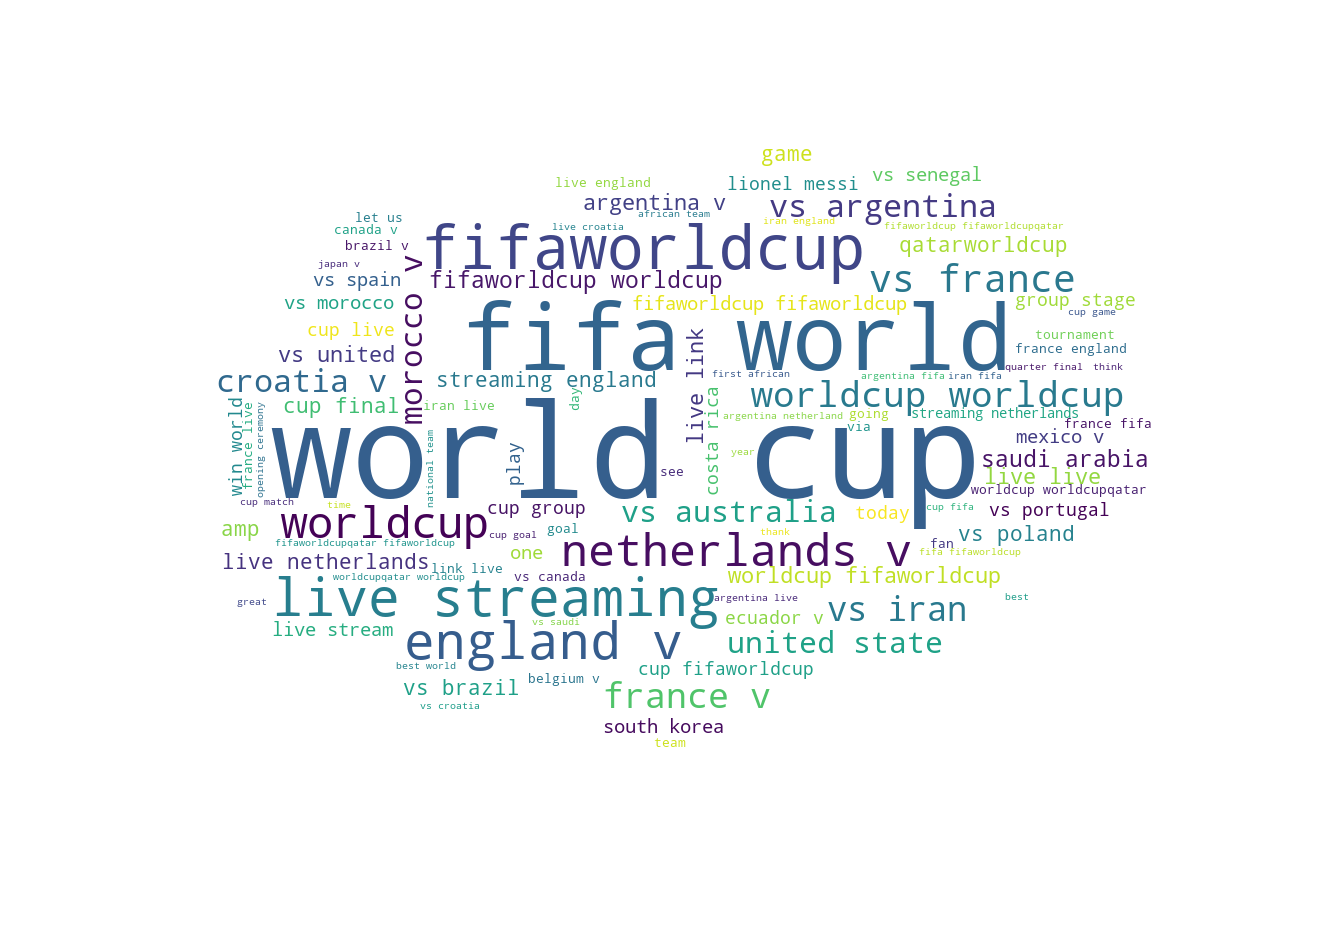

In [ ]:
# Positive sentiments Word cloud 
after_positive_values = " ".join(tw for tw in after_tweets_positive.Tweet)
create_wordcloud(after_positive_values)

Word Cloud Saved


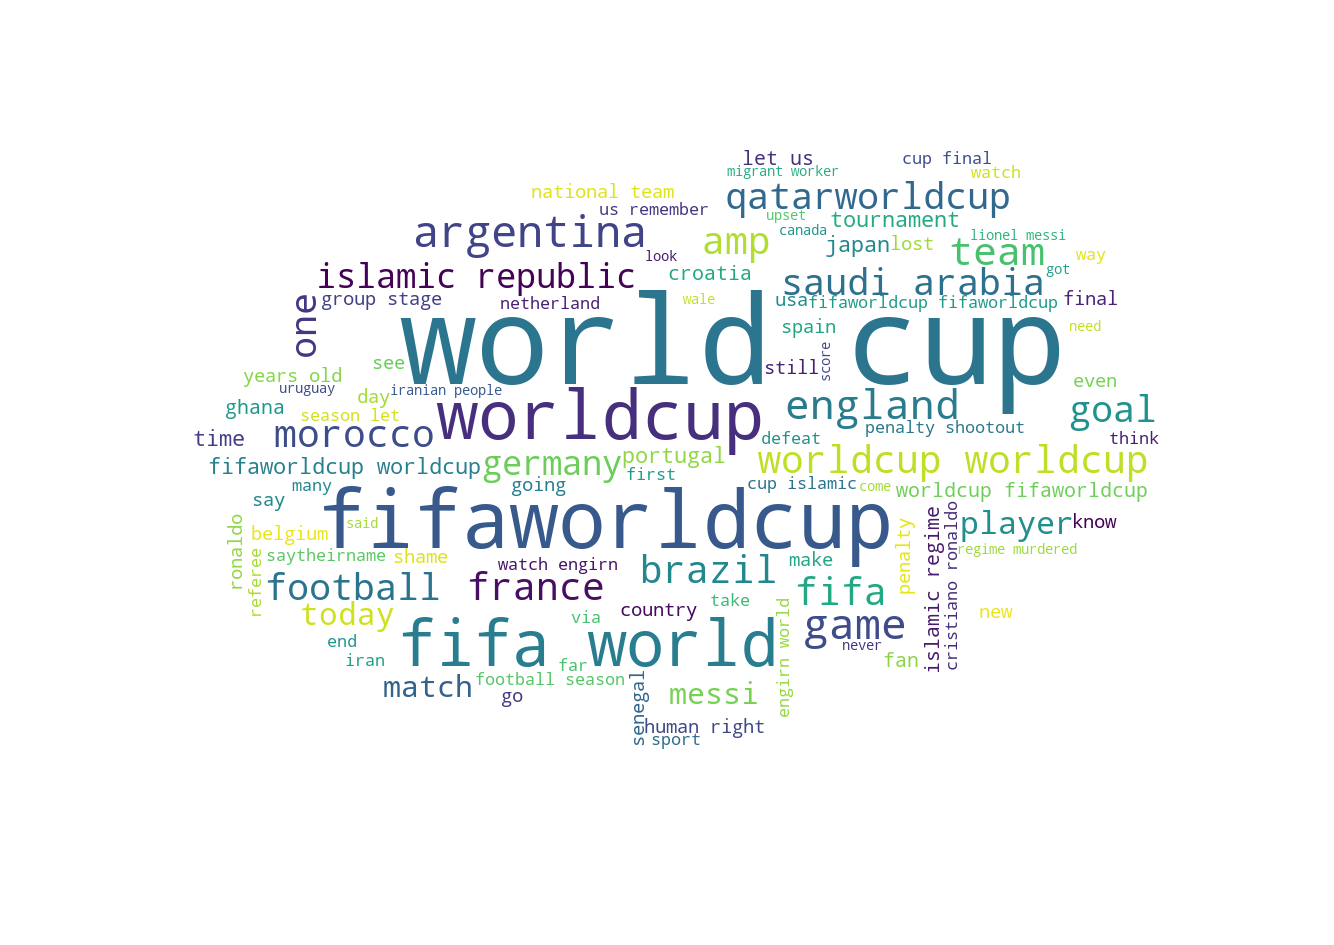

In [ ]:
# Negative sentiments Word cloud 
after_negative_values = " ".join(tw for tw in after_tweets_negative.Tweet)
create_wordcloud(after_negative_values)

## Confusion Matrix

In [ ]:
x = after_tweets_df.Tweet
y = after_tweets_df.Sentiment
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.2, random_state=SEED)

print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train == -1]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))

print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation), (len(x_validation[y_validation == -1]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))

print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test), (len(x_test[y_test == -1]) / (len(x_test)*1.))*100, (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 132958 entries with 16.20% negative, 83.80% positive
Validation set has total 26592 entries with 16.65% negative, 83.35% positive
Test set has total 6648 entries with 16.31% negative, 83.69% positive


In [ ]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [-1 if n < -1 else 1 for n in tbresult]
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,-1]))
confusion = pd.DataFrame(conmat, index=[1, -1],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 83.35%
--------------------------------------------------------------------------------
Confusion Matrix

    predicted_positive  predicted_negative
 1               22164                   0
-1                4428                   0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      4428
           1       0.83      1.00      0.91     22164

    accuracy                           0.83     26592
   macro avg       0.42      0.50      0.45     26592
weighted avg       0.69      0.83      0.76     26592



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


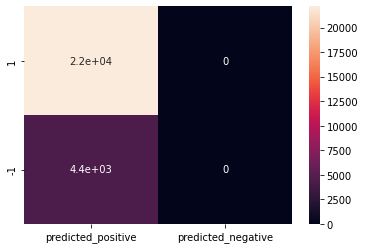

In [ ]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

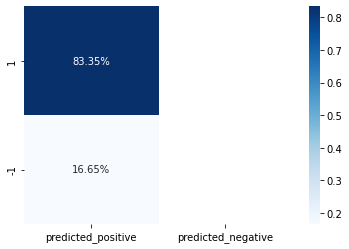

In [ ]:
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues')